In [1]:
%matplotlib inline
import copy
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import torch
from p2ch13.dsets import getCandidateInfoList, getCt, old_build2dLungMask, TrainingLuna2dSegmentationDataset, CandidateInfoTuple
from p2ch13.model_seg import SegmentationMask, MaskTuple
from p2ch13.vis import build2dLungMask
from util.util import xyz2irc


candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=False)
candidateInfo_list[0]

CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(75.7212243102, 92.8873310394, -119.270564052))

In [3]:
series_list = sorted(set(t.series_uid for t in candidateInfo_list))

In [4]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = copy.deepcopy(cmap)
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.75, N+4)
    return mycmap
tgray = transparent_cmap(plt.cm.gray)
tpurp = transparent_cmap(plt.cm.Purples)
tblue = transparent_cmap(plt.cm.Blues)
tgreen = transparent_cmap(plt.cm.Greens)
torange = transparent_cmap(plt.cm.Oranges)
tred = transparent_cmap(plt.cm.Reds)


clim=(0, 1.3)
start_ndx = 3
mask_model = SegmentationMask().to('cuda')


In [9]:
ds = TrainingLuna2dSegmentationDataset(
            val_stride=10,
            isValSet_bool=False,
            contextSlices_count=3,
            # augmentation_dict=self.augmentation_dict,
        )

def _ds_iter():
    for i in range(len(ds)):
        yield ds[i]

ds_iter = _ds_iter()

2020-01-18 09:46:15,656 INFO     pid:22444 p2ch13.dsets:561:__init__ <p2ch13.dsets.TrainingLuna2dSegmentationDataset object at 0x000002AFE62FA860>: 799 training series, 152187 slices


torch.Size([1, 64, 64])


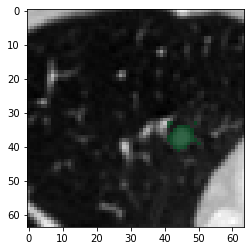

In [12]:
ct_t, label_int, pos_t, series_uid, ct_ndx = next(ds_iter)

print(pos_t.shape)

plt.imshow(ct_t[3], cmap='gray')
plt.imshow(pos_t[0], cmap=(tred if label_int else tgreen))

In [ ]:
assert False

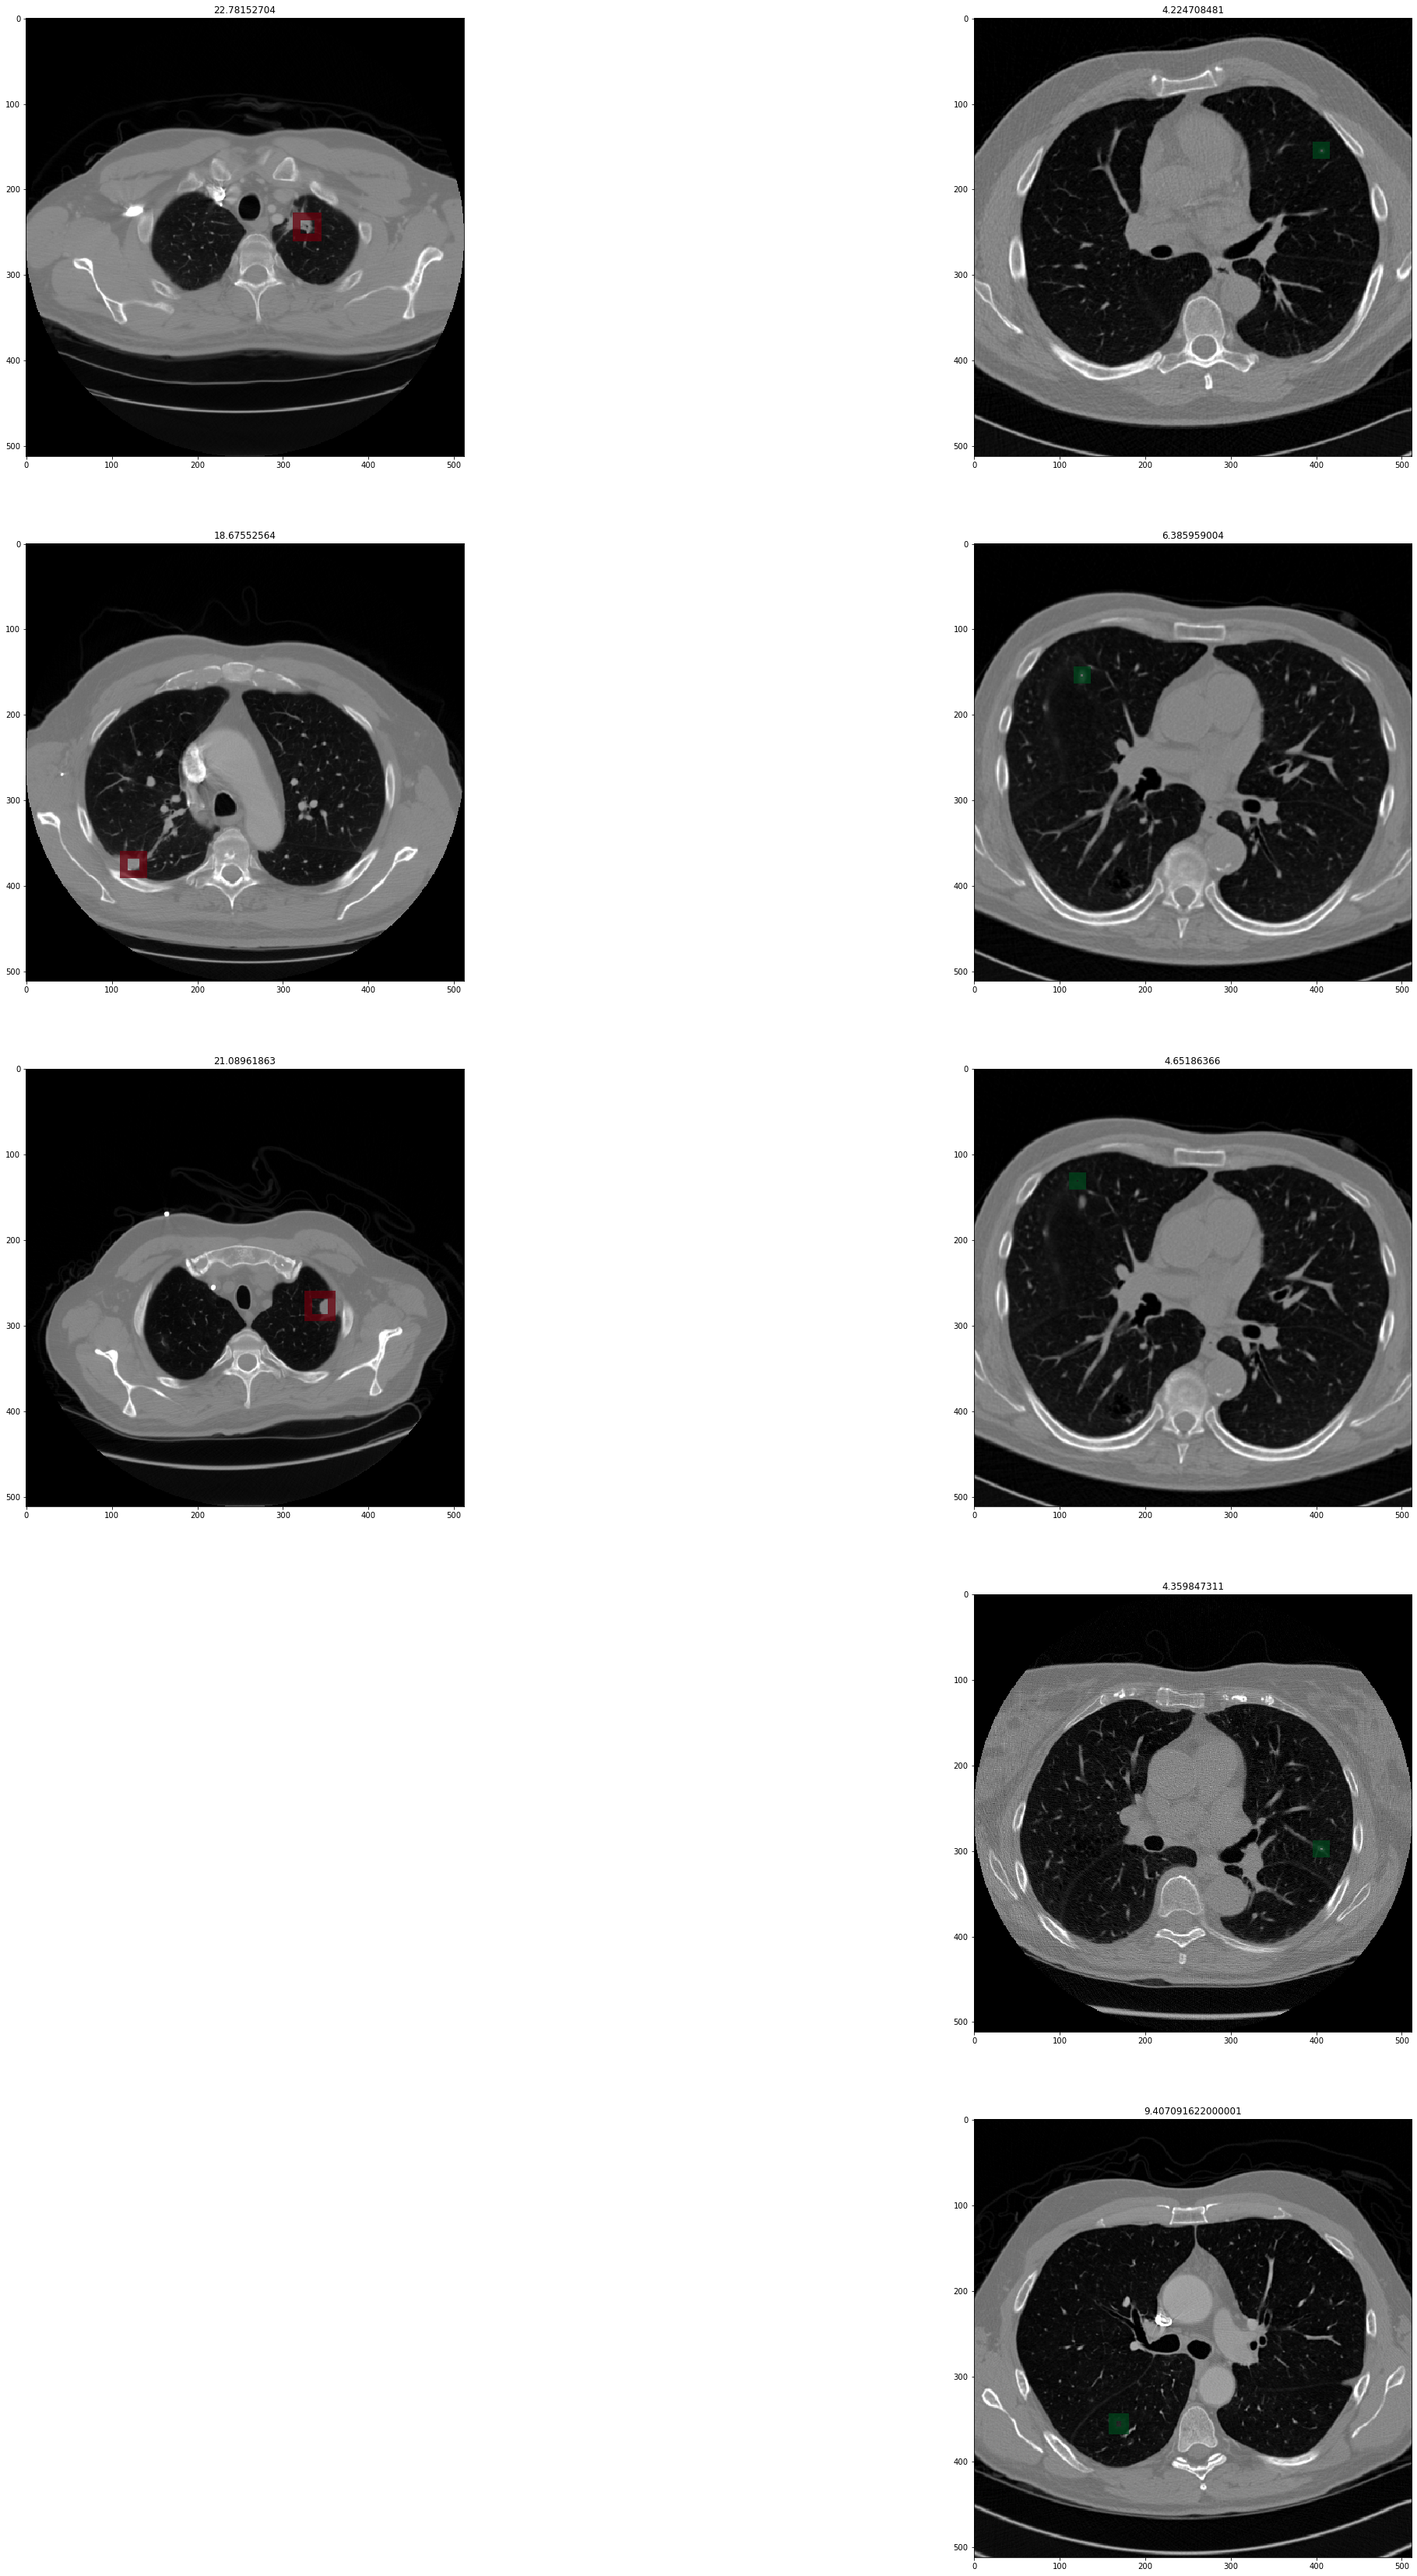

In [36]:
candidateInfo_list = [
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=22.78152704, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.487745546557477250336016826588', center_xyz=(57.019403322, -8.75982886873, -77.0854752725)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=18.67552564, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353693253759289796610', center_xyz=(-107.92, 72.82, -133.53)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=True, diameter_mm=21.08961863, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408431413578140925249', center_xyz=(96.2846726653, 19.0348690723, -88.478440818)),
]
ct_list = []

for candidateInfo_tup in candidateInfo_list:
    ct = getCt(candidateInfo_tup.series_uid)
    center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
    
    ct_list.append((ct, center_irc,candidateInfo_tup ))
#start_ndx = nit_ndx + 1

fig = plt.figure(figsize=(40,60))
subplot_ndx = 0 
for ct_ndx, (ct, center_irc, candidateInfo_tup) in enumerate(ct_list):
        subplot_ndx = 1 + ct_ndx * 2
        subplot = fig.add_subplot(5, 2, subplot_ndx)
        subplot.set_title(str(candidateInfo_tup.diameter_mm))

        mask_a = np.zeros_like(ct.hu_a[int(center_irc.index)])
        r = int(center_irc.row)
        c = int(center_irc.col)
        d = int(ct.vxSize_xyz[0] * candidateInfo_tup.diameter_mm / 2)

        mask_a[r-d-9:r+d+9,c-d-9:c+d+9] = 1
        mask_a[r-d:r+d,c-d:c+d] = 0

        subplot.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 1000), cmap='gray')
        subplot.imshow(mask_a, cmap=tred)
        
#        plt.imshow(mask_tup[attr_ndx][0][0].cpu(), clim=clim, cmap=tblue)

candidateInfo_list = [
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=False, diameter_mm=4.224708481, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860', center_xyz=(104.16480444, -211.685591018, -227.011363746)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=False, diameter_mm=6.385959004, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.229096941293122177107846044795', center_xyz=(-86.8657638653, -205.043508998, -202.72737134)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=False, diameter_mm=4.65186366, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.229096941293122177107846044795', center_xyz=(-89.9, -218.59, -203.6)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=False, diameter_mm=4.359847311, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.299806338046301317870803017534', center_xyz=(77.22, 43.23, -154.99)),
    CandidateInfoTuple(isNodule_bool=True, hasAnnotation_bool=True, isMal_bool=False, diameter_mm=9.407091622000001, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.326057189095429101398977448288', center_xyz=(-51.6051014933, -91.2108536427, -156.559446479)),
]
ct_list = []

for candidateInfo_tup in candidateInfo_list:
    ct = getCt(candidateInfo_tup.series_uid)
    center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
    
    ct_list.append((ct, center_irc,candidateInfo_tup ))
#start_ndx = nit_ndx + 1

#fig = plt.figure(figsize=(20,30))
subplot_ndx = 0 
for ct_ndx, (ct, center_irc, candidateInfo_tup) in enumerate(ct_list):
        subplot_ndx = 1 + ct_ndx * 2 + 1
        subplot = fig.add_subplot(5, 2, subplot_ndx)
        subplot.set_title(str(candidateInfo_tup.diameter_mm))

        mask_a = np.zeros_like(ct.hu_a[int(center_irc.index)])
        r = int(center_irc.row)
        c = int(center_irc.col)
        d = int(ct.vxSize_xyz[0] * candidateInfo_tup.diameter_mm / 2)
        
        mask_a[r-d-9:r+d+9,c-d-9:c+d+9] = 1
        mask_a[r-d:r+d,c-d:c+d] = 0

        subplot.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 1000), cmap='gray')
        subplot.imshow(mask_a, cmap=tgreen)
        

In [ ]:
nit_ndx = 0
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)

print(mask_tup.pos_mask.sum() / (512*512))

plt.imshow(mask_tup.pos_mask)


In [ ]:
fig = plt.figure(figsize=(40,10))

#subplot = fig.add_subplot(1, 4, 1)
#subplot.set_title('ct', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 1000), cmap='gray')

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('ct', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')

#subplot = fig.add_subplot(1, 4, 3)
#subplot.set_title('ct annotation example', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 3000), cmap='gray')

#subplot = fig.add_subplot(1, 4, 2)
#subplot.set_title('raw_dense mask', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
#plt.imshow(mask_tup.dense_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('dense mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.dense_mask, clim=(0,1), cmap=tgray)


#subplot = fig.add_subplot(1, 3, 2)
#subplot.set_title('denoise mask', fontsize=30)
#plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
#plt.imshow(mask_tup.denoise_mask, clim=(0,0.5), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('body mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.body_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('air mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.air_mask, clim=(0,1), cmap=tgray)


In [ ]:
fig = plt.figure(figsize=(40,10))

subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('lung mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.lung_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('candidate mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.candidate_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('ben mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.neg_mask, clim=(0,1), cmap=tgray)

subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(ct.hu_a[int(center_irc.index)], clim=(-1000, 2000), cmap='gray')
plt.imshow(mask_tup.pos_mask, clim=(0,1), cmap=tgray)



In [ ]:
nit_ndx = 1
candidateInfo_tup = candidateInfo_list[nit_ndx]
ct = getCt(candidateInfo_tup.series_uid)
center_irc = xyz2irc(candidateInfo_tup.center_xyz, ct.origin_xyz, ct.vxSize_xyz, ct.direction_a)
print(candidateInfo_tup, 'center_irc', center_irc)

mask_tup = build2dLungMask(ct.series_uid, int(center_irc.index))
mask_tup = mask_tup._make(x.cpu().numpy()[0][0] for x in mask_tup)


fig = plt.figure(figsize=(20,20))

slice_a = ((ct.hu_a[int(center_irc.index)] / 1000) + 1) / 2
slice_a = slice_a.clip(0, 1)

subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('mal mask', fontsize=30)
for label in (subplot.get_xticklabels() + subplot.get_yticklabels()):
    label.set_fontsize(20)
plt.imshow(
    slice_a + 3 * slice_a * mask_tup.pos_mask, 
    #clim=(-2000, 2000), 
    cmap='gray',
)
#plt.imshow(ct.hu_a[int(center_irc.index)] * mask_tup.pos_mask, clim=(-1000,1000), cmap='gray')



In [ ]:
from p2ch13.training import LunaTrainingApp

cls_app = LunaTrainingApp(['--augmented', '--balanced'])
train_dl = cls_app.initTrainDl()

_ = train_dl.dataset[0]

In [ ]:
sample_ndx = 40

#while train_dl.dataset[sample_ndx][1][0]:
#    sample_ndx += 1

fig = plt.figure(figsize=(40,10))

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 1)
subplot.set_title('augmented nodule 1', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 2)
subplot.set_title('augmented nodule 2', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 3)
subplot.set_title('augmented nodule 3', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')

candidate_t, pos_t, series_uid, center_irc = train_dl.dataset[sample_ndx]
subplot = fig.add_subplot(1, 4, 4)
subplot.set_title('augmented nodule 4', fontsize=30)
plt.imshow(candidate_t[0,12], clim=(-1000, 500), cmap='gray')


print([sample_ndx, pos_t, series_uid, center_irc])


In [ ]:
print('a')
from p2ch13.dsets import TrainingLuna2dSegmentationDataset
print('yo')

ds = TrainingLuna2dSegmentationDataset(contextSlices_count=3, batch_size=4)
print('dawg')

input_t, label_int, raw_pos_t, series_uid, ct_ndx = ds[0]
print('sup')

plt.imshow(input_t[3])
print('yo')
